In [1]:
import mysql.connector

connection = mysql.connector.connect(user='root', password='secret',
                              host='mariadb',
                              database='mydb_bdea')
cur = connection.cursor()

In [2]:
cur.execute("LOAD DATA INFILE '/var/lib/mydb_bdea/sleep_data.csv' INTO TABLE sleep_data FIELDS TERMINATED BY ';' LINES TERMINATED BY '\r\n';")

In [3]:
import pandas as pd
query = "SELECT startDay, startTime, endDay, endTime, deepSleepSeconds, REMSleepSeconds, unmeasuredSeconds, lowestRespRate, highestRespRate FROM sleep_data;"
df = pd.read_sql(query, connection)
print(df.head(10))

     startDay startTime      endDay   endTime deepSleepSeconds   
0  2022-09-05  01:41:00  2022-09-05  06:05:00                0  \
1  2022-09-05  21:00:00  2022-09-06  06:08:00             2100   
2  2022-09-06  20:51:00  2022-09-07  04:49:00             2220   
3  2022-09-07  20:44:00  2022-09-08  04:44:00             3900   
4  2022-09-08  20:17:00  2022-09-09  04:26:00             4680   
5  2022-09-09  20:20:00  2022-09-10  06:20:00             2880   
6  2022-09-10  20:40:00  2022-09-11  05:23:00             3420   
7  2022-09-11  19:33:00  2022-09-12  05:00:36             1800   
8  2022-09-12  20:38:00  2022-09-13  04:23:00              960   
9  2022-09-13  21:09:00  2022-09-14  04:32:00             4920   

  REMSleepSeconds unmeasuredSeconds lowestRespRate highestRespRate  
0                                 0              9              15  
1           10140                 0              8              16  
2            8700                 0             10              16

/tmp/ipykernel_21/675860932.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [101]:
df.iloc[[216]]

,startDay,startTime,endDay,endTime,deepSleepSeconds,REMSleepSeconds,unmeasuredSeconds
216,﻿2022-09-03,21:39:00,2022-09-04,04:31:00,1740,4440,0


In [133]:
df["start"] = df['startDay'].astype(str) +"T"+ df["startTime"]
df["end"] = df['endDay'].astype(str) +"T"+ df["endTime"]

In [169]:
cols = ["deepSleepSeconds", "REMSleepSeconds", "unmeasuredSeconds", "highestRespRate", "lowestRespRate"]
df[cols] = df[cols].apply(pd.to_numeric)

In [142]:
df["start"] = pd.to_datetime(df["start"], format='ISO8601', errors='coerce')
df["end"] = pd.to_datetime(df["end"], format='ISO8601', errors='coerce')

In [143]:
df['startTime'] = pd.to_datetime(df['startTime'],format= '%H:%M:%S' )
df['endTime'] = pd.to_datetime(df['endTime'],format= '%H:%M:%S' )

In [151]:
df['sleepDuration'] = df['end'] - df['start']

In [152]:
df.dtypes

startDay                      object
startTime             datetime64[ns]
endDay                        object
endTime               datetime64[ns]
deepSleepSeconds               int64
REMSleepSeconds              float64
unmeasuredSeconds              int64
start                 datetime64[ns]
end                   datetime64[ns]
sleepDuration        timedelta64[ns]
dtype: object

In [153]:
print(df)

        startDay           startTime      endDay             endTime   
0     2022-09-05 1900-01-01 01:41:00  2022-09-05 1900-01-01 06:05:00  \
1     2022-09-05 1900-01-01 21:00:00  2022-09-06 1900-01-01 06:08:00   
2     2022-09-06 1900-01-01 20:51:00  2022-09-07 1900-01-01 04:49:00   
3     2022-09-07 1900-01-01 20:44:00  2022-09-08 1900-01-01 04:44:00   
4     2022-09-08 1900-01-01 20:17:00  2022-09-09 1900-01-01 04:26:00   
..           ...                 ...         ...                 ...   
212   2023-04-07 1900-01-01 22:52:00  2023-04-08 1900-01-01 04:38:00   
213   2023-04-08 1900-01-01 21:53:00  2023-04-09 1900-01-01 04:42:00   
214   2023-04-09 1900-01-01 21:52:00  2023-04-10 1900-01-01 05:24:00   
215   2023-04-10 1900-01-01 21:13:00  2023-04-11 1900-01-01 03:49:00   
216  ﻿2022-09-03 1900-01-01 21:39:00  2022-09-04 1900-01-01 04:31:00   

     deepSleepSeconds  REMSleepSeconds  unmeasuredSeconds               start   
0                   0              NaN                

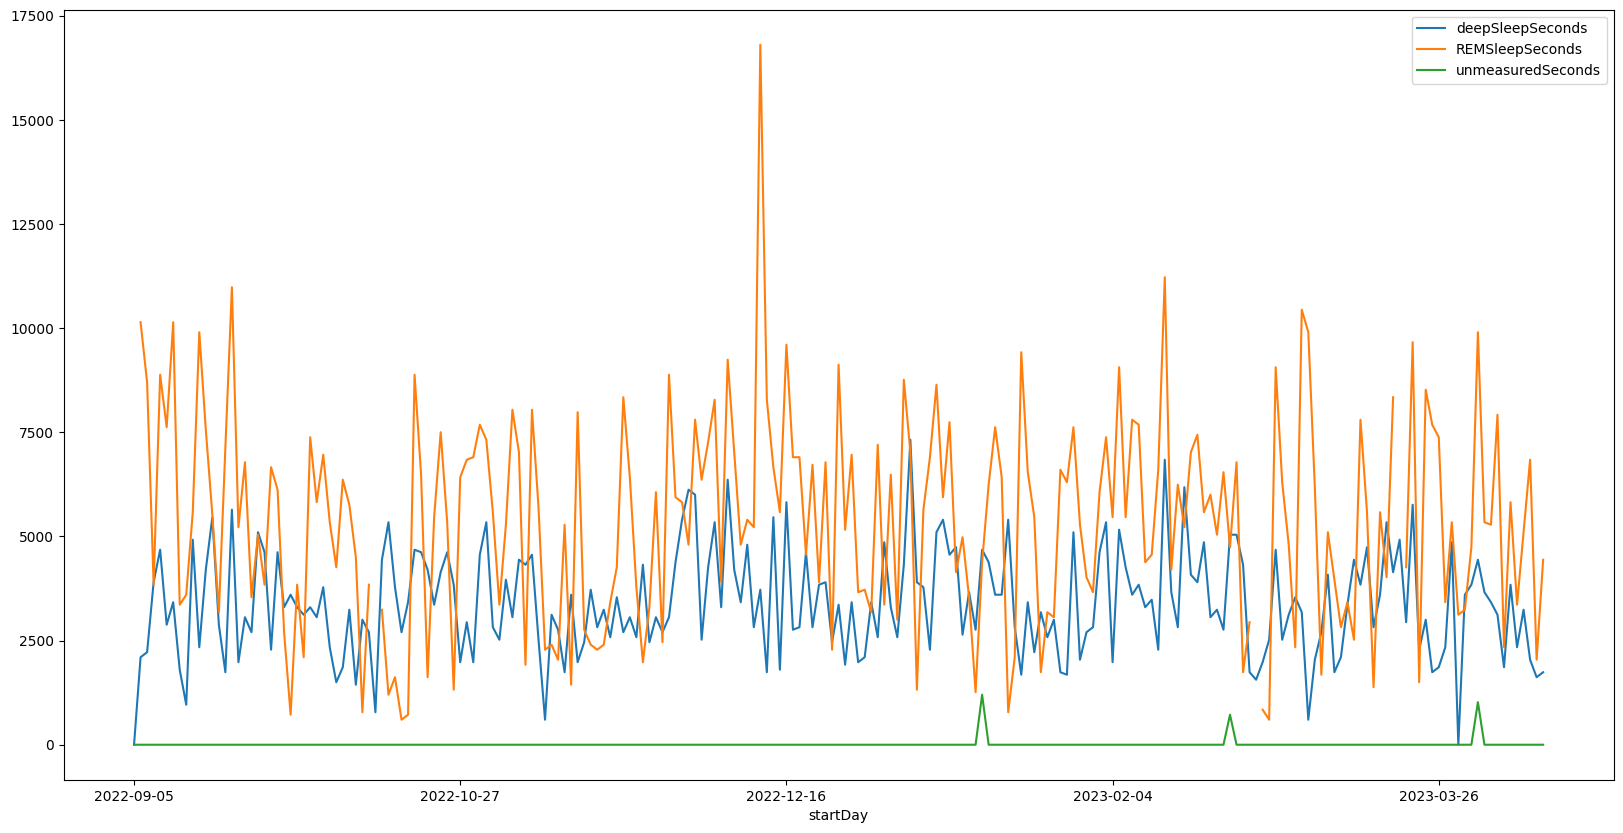

In [147]:
import matplotlib.pyplot as plt
df.plot(x="startDay", y=["deepSleepSeconds", "REMSleepSeconds", "unmeasuredSeconds"], figsize=(20, 10))
plt.show()

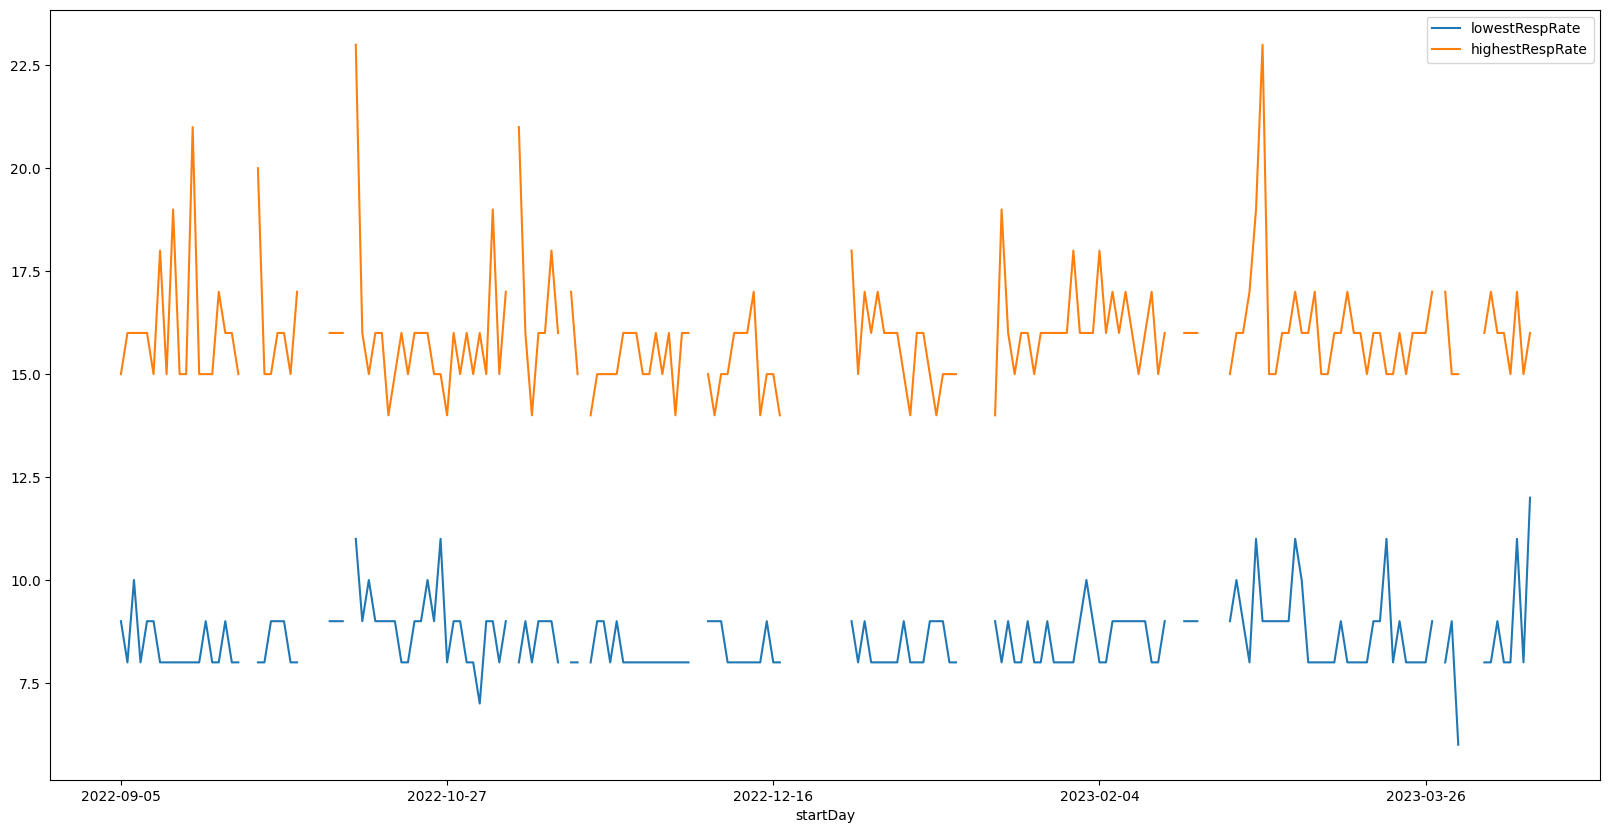

In [167]:
import matplotlib.pyplot as plt
df.plot(x="startDay", y=["lowestRespRate", "highestRespRate"], figsize=(20, 10))
plt.show()

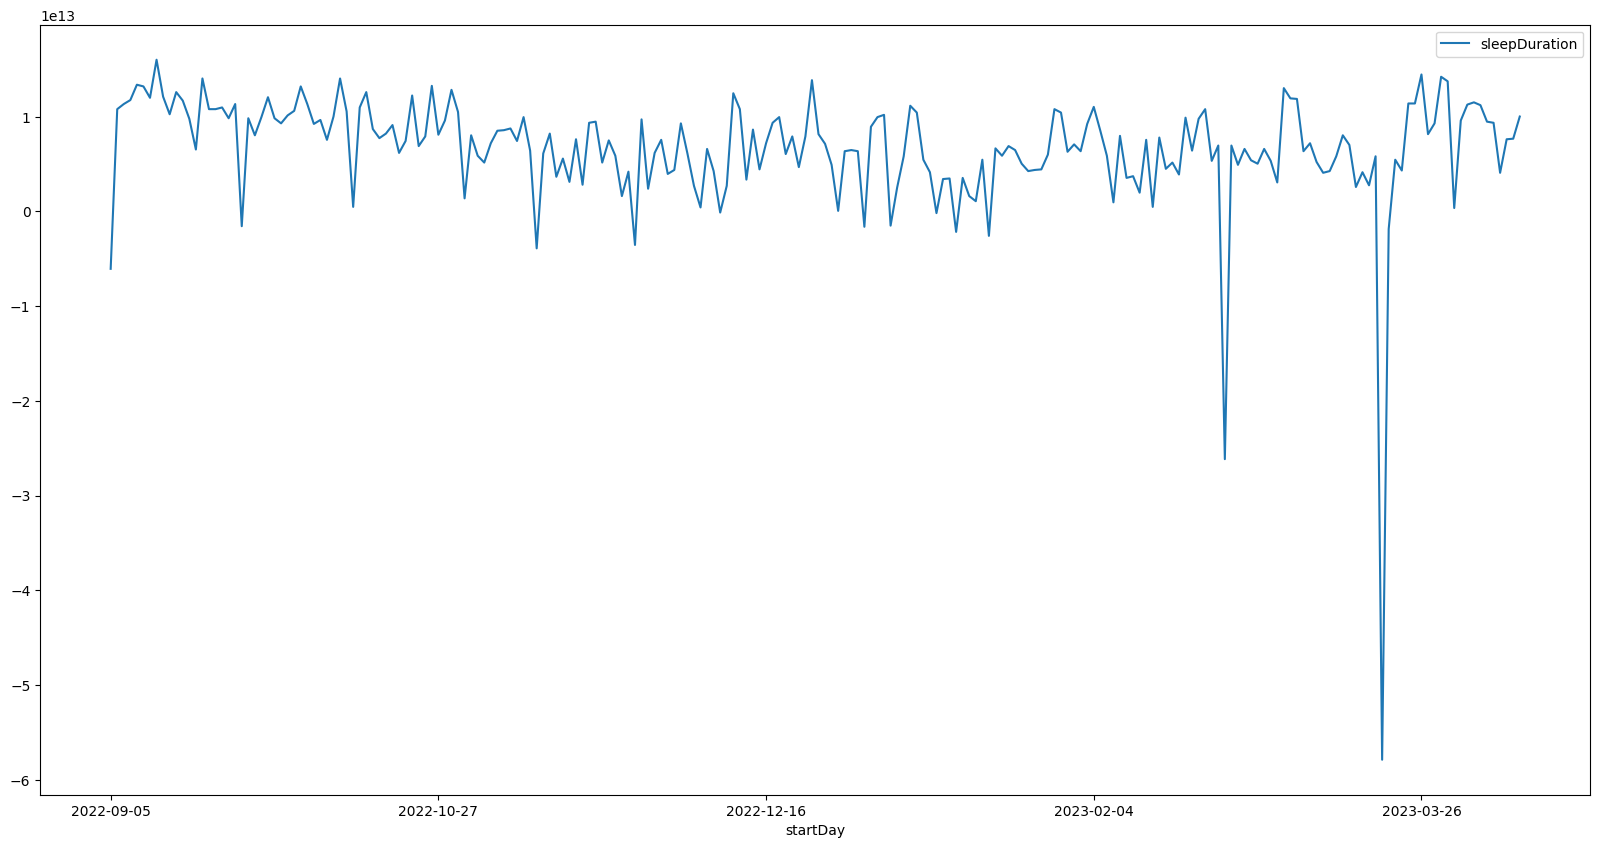

In [154]:
import matplotlib.pyplot as plt
df.plot(x="startDay", y="sleepDuration", figsize=(20, 10))
plt.show()

In [168]:
import pandas as pd
query = "SELECT overallScore, qualityScore, durationScore, recoveryScore, deepScore, REMScore, lightScore, awakeningsCountScore, awakeTimeScore, combinedAwakeScore, restfulnessScore, interruptionsScore, sleepFeedback  FROM sleep_data;"
df_score = pd.read_sql(query, connection)
print(df_score.head(10))

  overallScore qualityScore durationScore recoveryScore deepScore REMScore   
0           30           42            24            76         0        0  \
1           65           68           100           100        62       74   
2           86           85            97           100        64       82   
3           81           78            95            93        76       66   
4           88           83           100            87        81       82   
5           79           73           100            73        65       92   
6           87           85           100           100        70       76   
7           57           55            98            76        61       62   
8           50           50            73            77        40       68   
9           87           91            85           100        93       80   

  lightScore awakeningsCountScore awakeTimeScore combinedAwakeScore   
0          0                   61             41                 51  \

/tmp/ipykernel_405/2842125308.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_score = pd.read_sql(query, connection)


In [170]:
cols = ["overallScore", "qualityScore", "durationScore", "recoveryScore", "deepScore", "REMScore", "lightScore", "awakeningsCountScore", "awakeTimeScore", "combinedAwakeScore", "restfulnessScore", "interruptionsScore"]
df_score[cols] = df_score[cols].apply(pd.to_numeric)

/tmp/ipykernel_405/2148969457.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_count = pd.read_sql(query, connection)


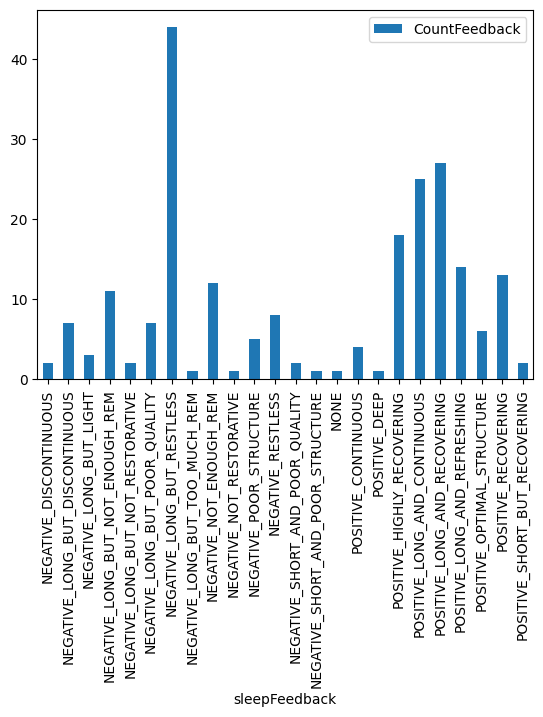

In [218]:
query = "SELECT sleepFeedback, COUNT(sleepFeedback) as CountFeedback FROM sleep_data group by sleepFeedback;"
df_count = pd.read_sql(query, connection)
df_count.plot(x = 'sleepFeedback', kind='bar')
plt.show()

In [227]:
query = "SELECT avg(awakeCount), sleepFeedback FROM sleep_data group by sleepFeedback;"
df_ = pd.read_sql(query, connection)
print(df_)

    avg(awakeCount)                      sleepFeedback
0          2.000000             NEGATIVE_DISCONTINUOUS
1          3.857143    NEGATIVE_LONG_BUT_DISCONTINUOUS
2          0.333333            NEGATIVE_LONG_BUT_LIGHT
3          0.909091   NEGATIVE_LONG_BUT_NOT_ENOUGH_REM
4          1.500000  NEGATIVE_LONG_BUT_NOT_RESTORATIVE
5          4.000000     NEGATIVE_LONG_BUT_POOR_QUALITY
6          1.318182         NEGATIVE_LONG_BUT_RESTLESS
7          0.000000     NEGATIVE_LONG_BUT_TOO_MUCH_REM
8          0.750000            NEGATIVE_NOT_ENOUGH_REM
9          0.000000           NEGATIVE_NOT_RESTORATIVE
10         3.200000            NEGATIVE_POOR_STRUCTURE
11         1.125000                  NEGATIVE_RESTLESS
12         3.500000    NEGATIVE_SHORT_AND_POOR_QUALITY
13         0.000000  NEGATIVE_SHORT_AND_POOR_STRUCTURE
14         2.000000                               NONE
15         0.250000                POSITIVE_CONTINUOUS
16         1.000000                      POSITIVE_DEEP
17        

/tmp/ipykernel_405/3722069528.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ = pd.read_sql(query, connection)


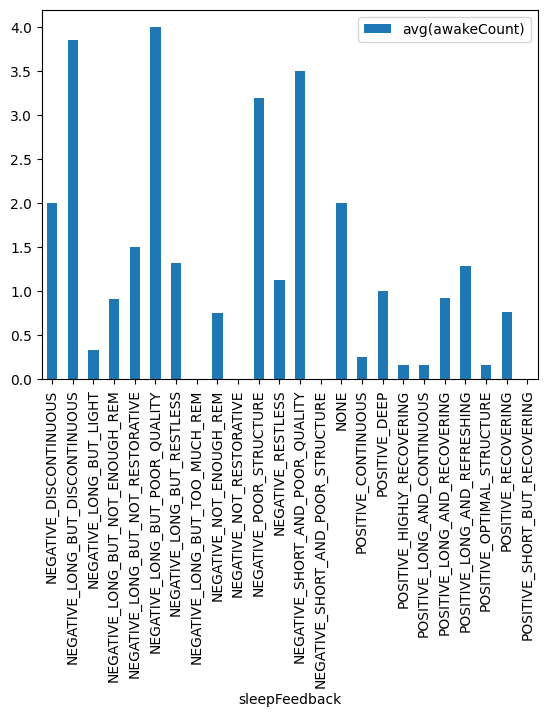

In [228]:
df_.plot(x = 'sleepFeedback', kind='bar')
plt.show()

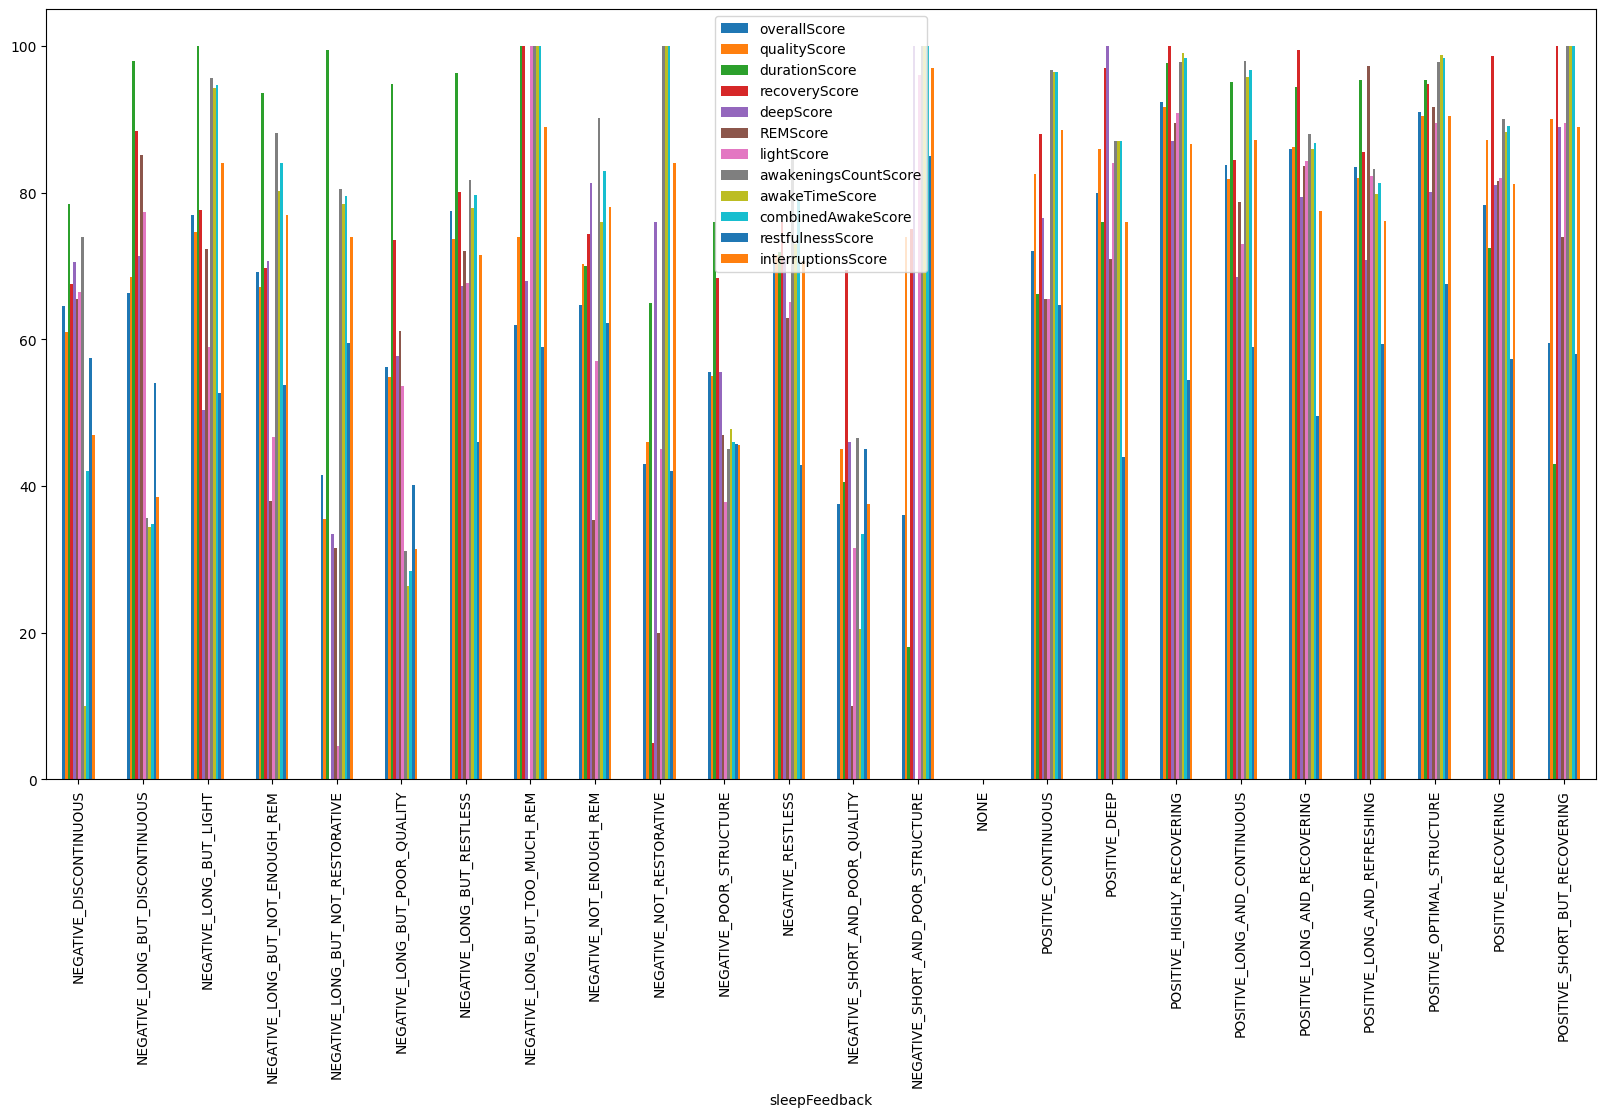

In [191]:
df_score.groupby('sleepFeedback').mean().plot(kind='bar', figsize=(20, 10))
plt.show()

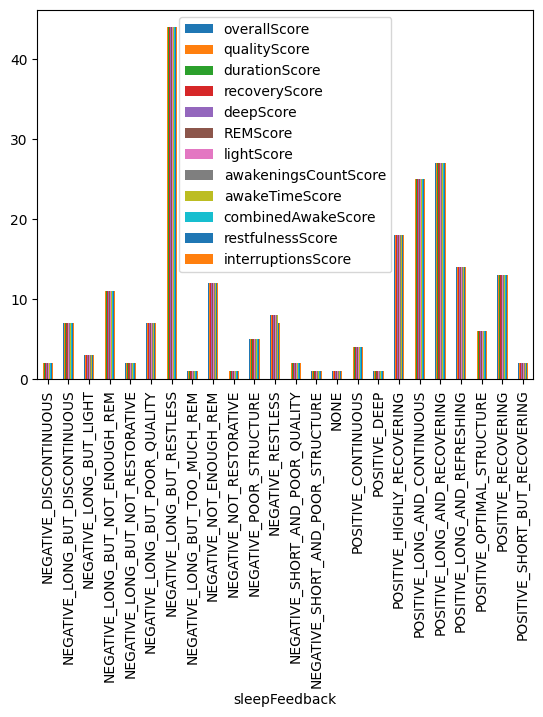

217


In [201]:
df_score.groupby('sleepFeedback').count().plot(kind='bar')
plt.show()
print(df_score["sleepFeedback"].count())